# Naive Bayes classifier

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [2]:
n = {'A': 40, 'B': 30}
cov = np.array([[4, 0], [0, 4]])
means = {'A': np.array([-3, -1]), 'B': np.array([2, 2])}

In [3]:
data = pd.DataFrame(index=range(sum(n.values())), columns=['x', 'y', 'label'])
data.loc[:n['A']-1, ['x', 'y']] = np.random.multivariate_normal(means['A'], cov, n['A'])
data.loc[:n['A']-1, ['label']] = 'A'
data.loc[n['A']:, ['x', 'y']] = np.random.multivariate_normal(means['B'], cov, n['B'])
data.loc[n['A']:, ['label']] = 'B'

In [4]:
def plot_points(data):
    fig = plt.figure(figsize=(8, 6))
    sns.set_style('white')
    sns.set_palette('muted')
    sns.scatterplot(data=data, x='x', y='y', hue='label', legend=False, edgecolor='black').set(xlim=(-9, 9), ylim=(-9, 9))

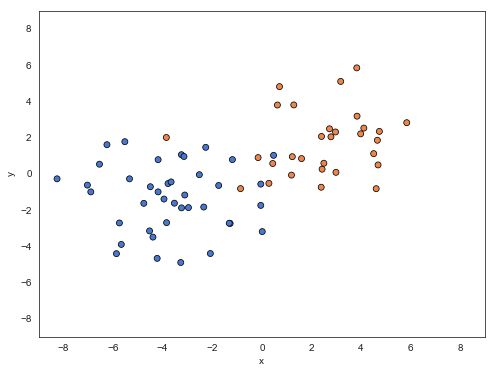

In [5]:
plot_points(data)

In [6]:
from sklearn.naive_bayes import GaussianNB

X = data[['x', 'y']]
y = data['label']
clf = GaussianNB()
clf.fit(X, y);

In [7]:
X_grid, y_grid = np.meshgrid(np.arange(-9, 9.1, 0.1), np.arange(-9, 9.1, 0.1))
prob = clf.predict_proba(np.c_[X_grid.ravel(), y_grid.ravel()])
prob = prob[:, 1].reshape(X_grid.shape)

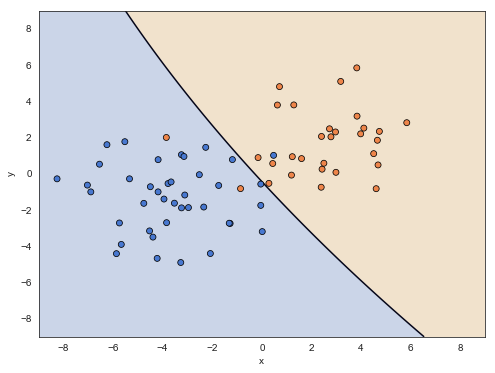

In [8]:
plot_points(data)
plt.contour(X_grid, y_grid, prob, [0.5], zorder=0)
plt.contourf(X_grid, y_grid, prob, [0, 0.5, 1], cmap='Pastel2', alpha=1, zorder=-1)

\begin{equation}
p(1|\boldsymbol{x}) \propto \pi_{1}p(\boldsymbol{x}|1) = \pi_{1}p(x|1)p(y|1)
\end{equation}

In [9]:
from scipy.stats import multivariate_normal
from scipy.stats import norm

def posterior_prob(prior_prob_1, prior_prob_2, mean_1, mean_2, cov, x, y):
#     likelihood_1 = multivariate_normal.pdf(X, mean_1, cov)
#     likelihood_2 = multivariate_normal.pdf(X, mean_2, cov)
    likelihood_x_1 = multivariate_normal.pdf(x, mean_1[0], cov[0, 0])
    likelihood_y_1 = multivariate_normal.pdf(y, mean_1[1], cov[1, 1])
    likelihood_x_2 = multivariate_normal.pdf(x, mean_2[0], cov[0, 0])
    likelihood_y_2 = multivariate_normal.pdf(y, mean_2[1], cov[1, 1])
    return prior_prob_2 * likelihood_x_2 * likelihood_y_2 / (prior_prob_1 * likelihood_x_1 * likelihood_y_1 + prior_prob_2 * likelihood_x_2 * likelihood_y_2)

In [10]:
prior_prob_A = n['A'] / sum(n.values())
prior_prob_B = n['B'] / sum(n.values())
prob = posterior_prob(prior_prob_A, prior_prob_B, means['A'], means['B'], cov, X_grid.ravel(), y_grid.ravel())
prob = prob.reshape(X_grid.shape)

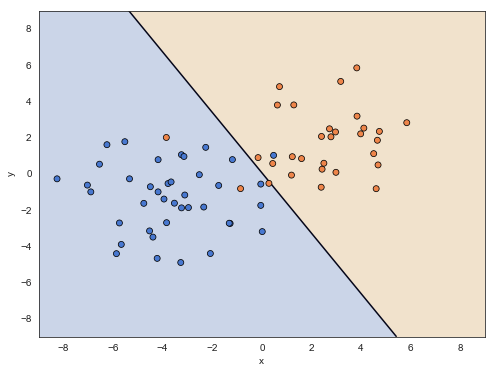

In [11]:
plot_points(data)
plt.contour(X_grid, y_grid, prob, [0.5], zorder=0)
plt.contourf(X_grid, y_grid, prob, [0, 0.5, 1], cmap='Pastel2', alpha=1, zorder=-1)